""

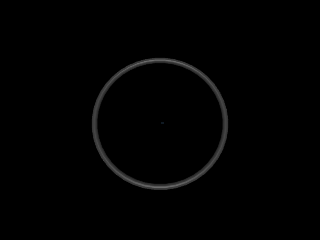

In [42]:
import time 
import itertools 
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import mujoco
import distutils.util
import os
import subprocess

np.set_printoptions(precision=3, suppress=True, linewidth=100)

# Defining the wheel here...
xml = """
<mujoco>
    
    <asset>
        <mesh name="cyrwheel_mesh" file="cyrwheel.obj" scale="0.8 0.8 0.8"/>
        <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3" rgb2=".2 .3 .4" width="300" height="300"/>
        <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
    </asset>
    <worldbody>
        <light name="top" pos="0.1 0.1 0.1"/>
        <geom size="1 1 1" type="plane" material="grid" pos="0 0 0"/>
        <body name="cyrwheel" pos="0.2 0.2 0.2">
            <freejoint/>
            <geom type="mesh" mesh="cyrwheel_mesh" size=".2 .2 .2" pos="0 0 0" euler="30 0 0"/>
        </body>
    </worldbody>
    
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml) # this makes a model out of the xml such that we can use it. 

data = mujoco.MjData(model)

# Make renderer, render and show the pixels
renderer = mujoco.Renderer(model)
# media.show_image(renderer.render())

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

""

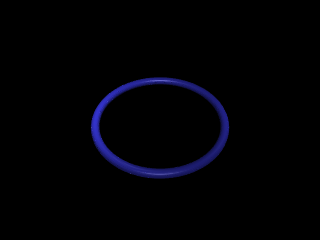

In [60]:
import time 
import itertools 
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import mujoco
import distutils.util
import os
import subprocess

np.set_printoptions(precision=3, suppress=True, linewidth=100)

# Defining the wheel here...
xml = """
<mujoco>
  <extension>
    <plugin plugin="mujoco.sdf.torus">
      <instance name="torus">
        <config key="radius1" value="1.5"/>
        <config key="radius2" value="0.10"/>
      </instance>
    </plugin>
  </extension>

  <asset>
    <mesh name="torus">
      <plugin instance="torus"/>
    </mesh>
  </asset>

  <option sdf_iterations="10" sdf_initpoints="40"/>


  <default>
    <geom solref="0.01 1" solimp=".95 .99 .0001" friction="0.1"/>
  </default>

  <worldbody>
    <body pos="-1 0 3.8">
      <freejoint/>
      <geom type="sdf" mesh="torus" rgba=".2 .2 .8 1">
        <plugin instance="torus"/>
      </geom>
    </body>

    <light name="left" pos="-2 0 7" cutoff="80"/>
    <light name="right" pos="2 0 7" cutoff="80"/>
  </worldbody>
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml) # this makes a model out of the xml such that we can use it. 

data = mujoco.MjData(model)

# Make renderer, render and show the pixels
renderer = mujoco.Renderer(model)
# media.show_image(renderer.render())

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

""

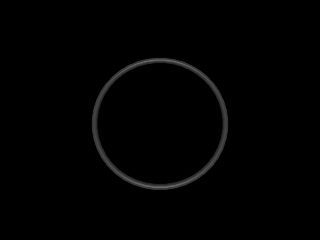

In [ ]:
import time 
import itertools 
import numpy as np
import mediapy as media
import matplotlib.pyplot as plt
import mujoco
import distutils.util
import os
import subprocess

np.set_printoptions(precision=3, suppress=True, linewidth=100)

# Defining the wheel here...
xml = """
<mujoco>
    <asset>
        <mesh name="cyrwheel_mesh" file="cyrwheel.obj"/>
        <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3" rgb2=".2 .3 .4" width="300" height="300"/>
        <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
    </asset>
    <worldbody>
        <light name="top" pos="0.1 0.1 0.1"/>
        <body name="cyrwheel" pos="0.2 0.2 0.2">
            <freejoint/>
            <geom type="mesh" mesh="cyrwheel_mesh" size=".2 .2 .2" pos="0 0 0" euler="30 0 0"/>
        </body>
    </worldbody>
    
</mujoco>
"""

model = mujoco.MjModel.from_xml_string(xml) # this makes a model out of the xml such that we can use it. 

data = mujoco.MjData(model)

# Make renderer, render and show the pixels
renderer = mujoco.Renderer(model)
# media.show_image(renderer.render())

mujoco.mj_forward(model, data)
renderer.update_scene(data)

media.show_image(renderer.render())

""

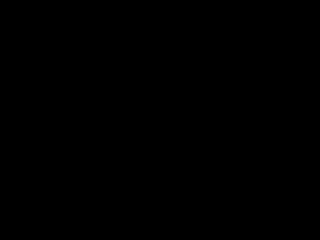

In [14]:
xml = """
<mujoco>
    <option integrator="RK4"/>
    <asset>
        <mesh name="cyrwheel_mesh" file="cyrwheel.obj"/>
        <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3" rgb2=".2 .3 .4" width="300" height="300"/>
        <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
    </asset>
    <worldbody>
        <geom size="2 2 .01" type="plane" material="grid"/>
        <light name="top" pos="0 0 1"/>
        <camera name="closeup" pos="0 -105 105" xyaxes="1 0 0 0 0 1"/>
        <body name="cyrwheel" pos="0 0 0.2">
            <freejoint/>
            <geom type="mesh" mesh="cyrwheel_mesh" size="0.2 0.2 0.2"/>
        </body>
    </worldbody>
    <keyframe>
        <key name="spinning" qpos="1.5708 0 0 0 0 0 1" qvel="0 0 0 0 1 200" />
    </keyframe>
</mujoco>

"""
model = mujoco.MjModel.from_xml_string(xml)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera="closeup")
media.show_image(renderer.render())

""

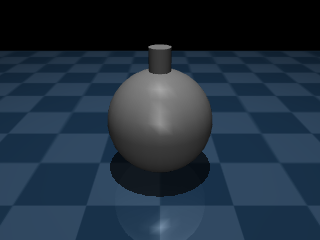

In [50]:
tippe_top = """
<mujoco model="tippe top">
  <option integrator="RK4"/>

  <asset>
    <texture name="grid" type="2d" builtin="checker" rgb1=".1 .2 .3"
     rgb2=".2 .3 .4" width="300" height="300"/>
    <material name="grid" texture="grid" texrepeat="8 8" reflectance=".2"/>
  </asset>

  <worldbody>
    <geom size=".2 .2 .01" type="plane" material="grid"/>
    <light pos="0 0 .6"/>
    <camera name="closeup" pos="0 -.1 .07" xyaxes="1 0 0 0 1 2"/>
    <body name="top" pos="0 0 .02">
      <freejoint/>
      <geom name="ball" type="sphere" size=".02" />
      <geom name="stem" type="cylinder" pos="0 0 .02" size="0.004 .008"/>
      <geom name="ballast" type="box" size=".023 .023 0.005"  pos="0 0 -.015"
       contype="0" conaffinity="0" group="3"/>
    </body>
  </worldbody>

  <keyframe>
    <key name="spinning" qpos="0 0 0.02 1 0 0 0" qvel="0 0 0 0 1 200" />
  </keyframe>
</mujoco>
"""
model = mujoco.MjModel.from_xml_string(tippe_top)
renderer = mujoco.Renderer(model)
data = mujoco.MjData(model)
mujoco.mj_forward(model, data)
renderer.update_scene(data, camera="closeup")
media.show_image(renderer.render())

duration = 7    # (seconds)
framerate = 60  # (Hz)
